In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#On commence montrer comment cette fonction peut créer une distribution uniforme entre 0 et 1 et donc a et b 
a=0
b=10
x = numpy.random.random_sample(100000)
y = (b-a)*x+a

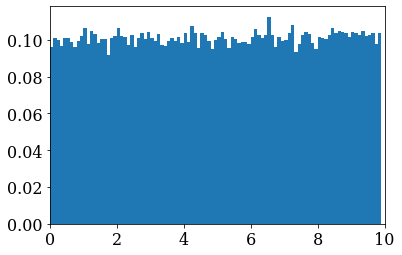

In [3]:

binwidth=0.1
pyplot.xlim(0,10)
pyplot.hist(y,bins=numpy.arange(0.,10., binwidth),density=True);


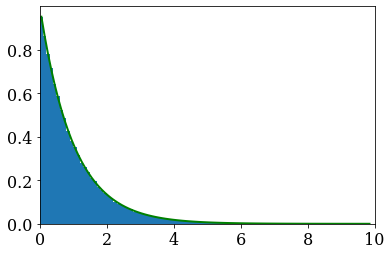

In [33]:
#On produit maintenant une exponentielle avec la méthode de la fonction cumultative inverse avec alpha=1 : 

alpha = 1.0
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

# Histogramme
binwidth=0.1
pyplot.xlim(0,10)
bins=numpy.arange(0.,10., binwidth)
pyplot.hist(y,bins,density=True);

# centrage des bins et fit 
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2, color='green')


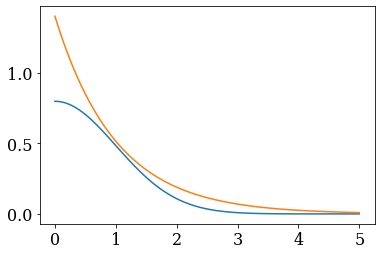

In [5]:
# On produit maintenant une gaussienne centrée en mu=0 de sigma=1 avec la méthode de Van Neumann et K=1.4


mu= 0
sigma= 1
K= 1.4

nx= 100
xi= numpy.linspace(0,5,nx)  #graphe de 0 à 5

f1= 2*numpy.exp(-xi**2/2.0)/numpy.sqrt(2*numpy.pi)
f2= K*numpy.exp(-numpy.abs(xi))

pyplot.plot(xi,f1)
pyplot.plot(xi,f2)

ratio de nombres gardés 0.3571


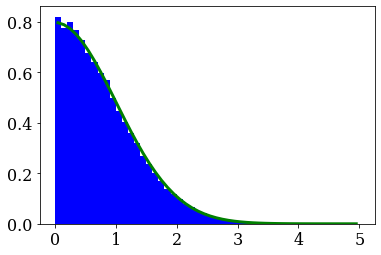

In [27]:



N=100000
mu= 0
sigma= 1
K = 1.4
alpha = 1.0

# On produit la distribution exponentielle avec la méthode précédente
u1 = numpy.random.random_sample(N)
x = -1/alpha*numpy.log(1-u1) 

# Probabilité d'obtenir x selon la distribution exponentielle (alpha=1)
p_x_exp = numpy.exp(-x)

# Probabilité d'obtenir x selon la distribution gaussienne (mu=0, sigma=1)
p_x_gauss = numpy.exp(-(x - mu)**2/(2.0*sigma**2))/(numpy.sqrt(2*numpy.pi)*sigma **2)

# autre variable uniforme pour la sélection des chiffres que l'on prend
                      
u2 = numpy.random.random_sample(N)

# condition d'exctraction
condition = u2 < p_x_gauss / (K*p_x_exp )

# Extraction
h = numpy.extract(condition,x)

# Print the acceptance ratio
print("ratio de nombres gardés",h.size/x.size)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,density='true',color='blue');

# Cntrage des bins et fit
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


# ici on a multiplié par 2 car on a la gaussienne définie positive (il faut donc ajuster la constante de normalisation)




In [28]:
# trouver une distribution interressante de python et la tracer

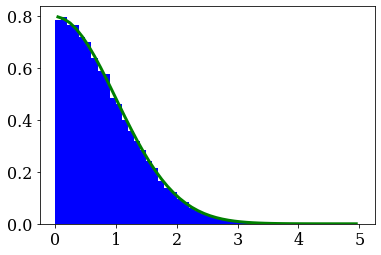

In [30]:
#utilisions le générateur aléatoires de nombres de distribution gaussienne : 

N=100000
mu= 0
sigma= 1

y = numpy.random.normal(loc=mu, scale=sigma, size = N)

#plot
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(y,bins,density='true',color='blue');

#centrage bin + fit

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

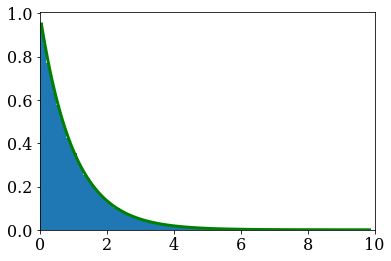

In [32]:
#utilisions le générateur aléatoires de nombres de distribution exponentielle :

N=100000
sigma=1

y = numpy.random.exponential(scale=sigma, size=N)

#plot

binwidth=0.1
pyplot.xlim(0,10)
bins=numpy.arange(0.,10., binwidth)
pyplot.hist(y,bins,density=True);

#centrage bins + fit

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=3, color='green')

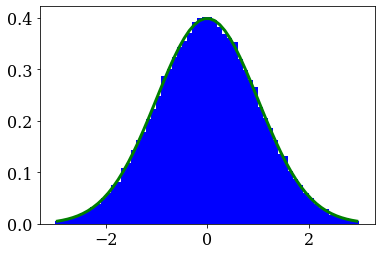

In [39]:
#l'algorithme de Box muller pour une distibution gausienne (mu=0,sigma=1) soit N(0,1)

N=100000

u1 = numpy.random.random_sample(N)
u2 = numpy.random.random_sample(N)

y = numpy.sqrt(-2*numpy.log(u1)) * numpy.cos(2*numpy.pi*u2)

#plot
binwidth=0.1
bins=numpy.arange(-3.,3.1, binwidth)
pyplot.hist(y,bins,density='true',color='blue');

#centrage bin + fit

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


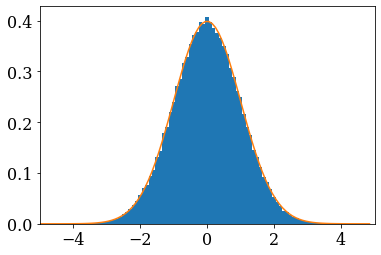

In [46]:
#on passe à la tache n2 on commence par résoudre le problème de diffution sans paramètre c ni gamma
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16



#on génère la position initialle d'un set de particule npart centré en 0 selon une ditribution gaussienne sigma=1

npart=100000

mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=mu,scale=sigma,size=npart)

# On génere des bins qu'on centre en 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins - binwidth/2

# les bins sont déjà centrée pour le fit
bin_centers = bins

# Plot de l'hito et fit de la disrtibution attendue 
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,density=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

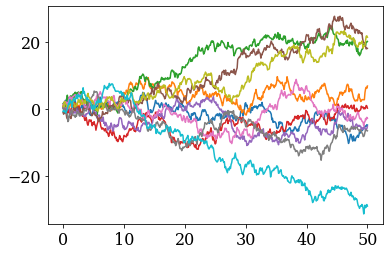

In [47]:
#on simule maintenant l'évolution de ces particules en implémentant la gaussienne centrée d'évolution mu2=0 et sigma2 =1 egalement : 

T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])


mu2=0
sigma2=1

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(loc=mu2,scale=sigma2,size=npart)
    
# On regarde l'évolution des 10 premières particules   

for i in range(10):
    pyplot.plot(t,x[:,i])
    
    

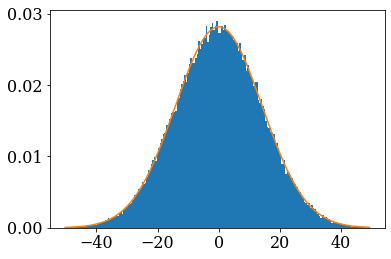

In [49]:
#on trace maintenant la distribution obtenue à la fin et on voit bien qu'elle est gaussienne comme attendu : 

#binning + centrage 
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins - binwidth/2

# bins déjà centrée
bin_centers = bins

# plot a histrogram for verification
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2  #la constante sigma attendue apreès l'évolution au carré
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

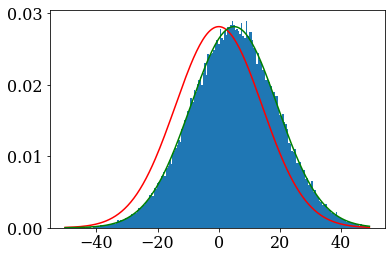

In [55]:
# on rajoute une vitesse c=0,1

#on simule maintenant l'évolution de ces particules en implémentant la gaussienne centrée d'évolution mu2=0 et sigma2 =1 egalement : 

c=0.1
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])


mu2=0
sigma2=1

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(loc=mu2,scale=sigma2,size=npart) + c*dt
    
#on trace maintenant la distribution obtenue à la fin  

#binning + centrage 
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins - binwidth/2

# bins déjà centrée
bin_centers = bins

# plot a histrogram for verification
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2  #la constante sigma attendue dans l'évolution 
mu = 0 
mut = mu + c*T

#distribution attendue sans le c
pyplot.plot(bin_centers, numpy.exp(-(bin_centers -mu)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2), color = 'red')

#avec le c donc en changeant mu par mut

pyplot.plot(bin_centers, numpy.exp(-(bin_centers -mut)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2), color = 'green')

    


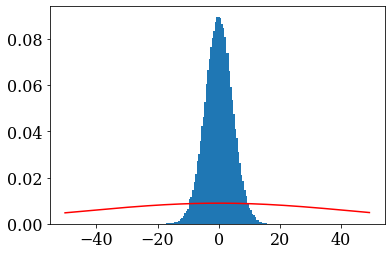

In [61]:
#on le fait mainetant pour la friction avec gamma et on multiplie T (et donc nt) par 10

gamma=0.1
T=500.0
nt=5000
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])


mu2=0
sigma2=1

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(loc=mu2,scale=sigma2,size=npart) - gamma*x[i]*dt
    
    
#on trace maintenant la distribution obtenue à la fin  

#binning + centrage 
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins - binwidth/2

# bins déjà centrée
bin_centers = bins

# plot a histrogram for verification
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2  #la constante sigma attendue dans l'évolution 
mu = 0 
mut = mu + c*T

#distribution attendue sans le gamma mais quand T tend vers l'infini
pyplot.plot(bin_centers, numpy.exp(-(bin_centers -mu)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2), color = 'red')



#reste à déduire l'évolution



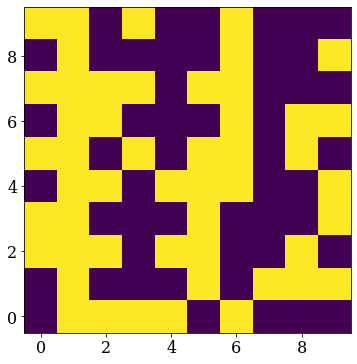

In [256]:
#mooc n4 on commence par vérifier l'algorithme de Metropolis 

#simulation aléatoire d'une configuration initiale 

def initial_state(nx,ny):
    
     # spin aléatoire entier 0 ou 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # quand on a 0 on pose le spin à -1
    r[r==0] =-1

    return r

#on les place maintenant sur une grille 10x10

nx=10
ny=10

# aplha est la costante adimentionnelle (J/K_b T)
alpha = 0.1

# on place le spin aléatoire sur chaque case
sp = initial_state(nx,ny)

pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')
   

In [257]:



def energy_at_site(sp,alpha,ix,iy):
    
    energy= -alpha*sp[ix,iy]*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

def energy_at_site_flipped(sp,alpha,ix,iy) :
    
    energy2 =  alpha*sp[ix,iy]*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])
    
    return energy2


def delta_E(sp,alpha,ix,iy) :

    deltaE = energy_at_site_flipped(sp,alpha,ix,iy) - energy_at_site(sp,alpha,ix,iy)
    
    return deltaE

print("deltaE(5,5)",delta_E(sp,alpha,5,5))




#vérification on regarde donc que p2/p1=e^(-delta E) pour la case (5,5) : on définit p_up/P_down en fonction de l'etat initial

def Rapport_Pup_Pdown (sp,alpha,ix,iy) :
    if ((sp[ix,iy])==1) :
        Rapport = numpy.exp( delta_E(sp,alpha,ix,iy))

    if ((sp[ix,iy])==-1) :

        Rapport = numpy.exp( - delta_E(sp,alpha,ix,iy))
    
    return Rapport


print ("rapport théorique P_up/P_down",Rapport_Pup_Pdown (sp,alpha,5,5))



# on passe maintenant à l'algo métropolis :

def metropolis_at_site(sp,alpha,ix,iy):
    
    if (numpy.random.random()<numpy.exp(- delta_E(sp,alpha,ix,iy))):
        sp[ix,iy]= -sp[ix,iy]





deltaE(5,5) 0.0
rapport théorique P_up/P_down 1.0


In [258]:
# appliquons celà à la case (5,5) un grand nombre de fois 

NM = 100000
states = numpy.empty(NM+1)
states[0]=sp[5,5]

for n in range(0,NM):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

    
ups = numpy.extract(states==1, states).size
downs = NM - ups


print("rapport métropolis",ups/downs)

rapport métropolis 1.0


In [270]:
#on va commencer par une configuration initiale uniforme que des spins up et regarder l'énergie moyenne en fct de alpha

nx = 100
ny = 100

sp = numpy.ones([nx,ny])


In [271]:
# on refait l'algo metropolis sur nx*ny cases aléatoires du système:

def ising_model_metropolis(sp, NM, nx, ny, alpha):  
    
    states = numpy.empty([NM+1,nx,ny])
    states[0] = sp.copy()
    
    
    for i in range(1,NM+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [272]:
#on applique cette méthode pour différents alpha entre 0 et 1

NM=100
alpha=0.1
states_0_1 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.2
states_0_2 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.3
states_0_3 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.4
states_0_4 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.5
states_0_5 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.6
states_0_6 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.7
states_0_7 = ising_model_metropolis(sp, NM, nx, ny, alpha)


sp = numpy.ones([nx,ny])
NM=100
alpha=0.8
states_0_8 = ising_model_metropolis(sp, NM, nx, ny, alpha)

sp = numpy.ones([nx,ny])
NM=100
alpha=0.9
states_0_9 = ising_model_metropolis(sp, NM, nx, ny, alpha)



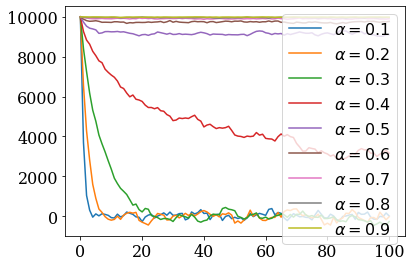

In [273]:
pyplot.figure()
pyplot.plot(states_0_1.sum(axis=(1,2)),label=r'$\alpha=0.1$')
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_0_3.sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_0_6.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_0_8.sum(axis=(1,2)),label=r'$\alpha=0.8$')
pyplot.plot(states_0_9.sum(axis=(1,2)),label=r'$\alpha=0.9$')

pyplot.legend()
pyplot.tight_layout()

In [275]:
print(p[1:-1,1:-1])


NameError: name 'p' is not defined

In [280]:
p=numpy.array([1,2,3,4,5])
print(p[2:-2])

[3]
